In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


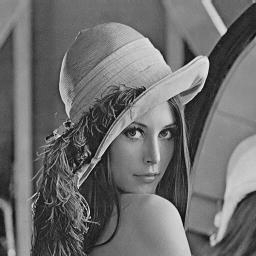

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

로보츠 에지 검출기

In [10]:
gx = np.array([[-1,0],[0,1]],dtype=int)
gy = np.array([[0,-1],[1,0]],dtype=int)

In [16]:
gx = np.array([[-1,0,0],[0,1,0],[0,0,0]],dtype=int)
gy = np.array([[0,0,-1],[0,1,0],[0,0,0]],dtype=int)

소벨 검출기

In [43]:
gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=int)
gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)

프리윗 에지 검출기

In [41]:
gx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
gy = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)

에지 검출

In [44]:
x=cv2.filter2D(gimg1,-1,gx)
y=cv2.filter2D(gimg1,-1,gy)

In [45]:
absx = cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)

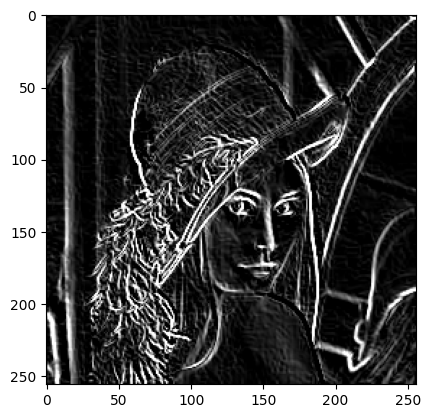

In [46]:
outimg = cv2.addWeighted(absx,1,absy,1,0)
plt.imshow(outimg, cmap='gray')


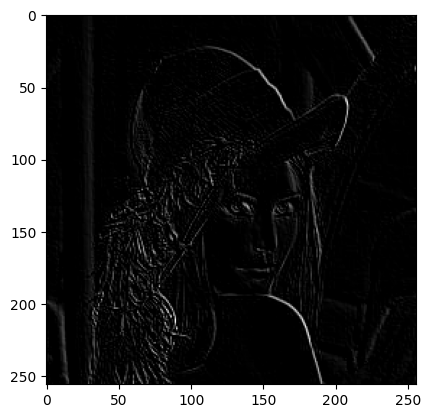

In [22]:
plt.imshow(absx, cmap='gray')


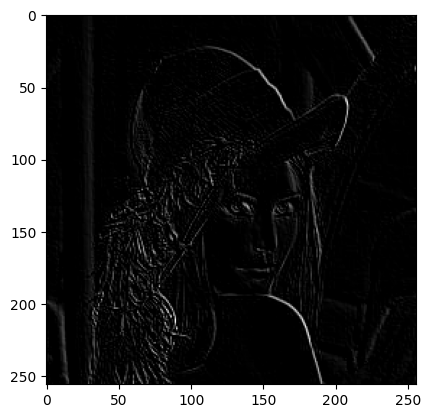

In [23]:
plt.imshow(absy, cmap='gray')

In [54]:
#이진화
gbin = np.zeros(gimg1.shape,dtype=int)

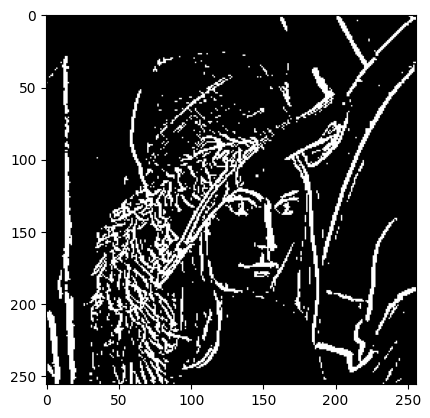

In [55]:
threshold = 90
for i in range(gimg1.shape[0]):
  for j in range(gimg1.shape[1]):
    if outimg[i,j] > threshold:
      gbin[i,j] = 255


plt.imshow(gbin, cmap='gray')

케니 에지 검출기

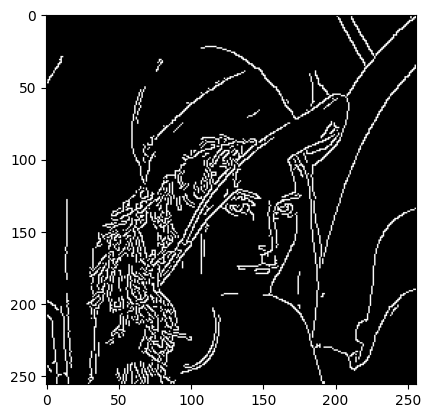

In [61]:
outimg1 = cv2.Canny(gimg1,150,250)
plt.imshow(outimg1, cmap='gray')